# Исследование данных сервиса аренды самокатов

Данный проект направлен на изучение данных о пользователях и их поездках в популярном сервисе аренды самокатов GoFast.

Целью проекта является выявление факторов, которые могут способствовать росту бизнеса аренды самокатов GoFast и оптимизации его деятельности.




Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

* без подписки:  
    * абонентская плата отсутствует;  
    * стоимость одной минуты поездки — 8 рублей;  
    * стоимость старта (начала поездки) — 50 рублей;  


* с подпиской Ultra:  
    * абонентская плата — 199 рублей в месяц;  
    * стоимость одной минуты поездки — 6 рублей;  
    * стоимость старта — бесплатно.
    




Данные, предоставленные на анализ, состоят из трех наборов:

* Пользователи (`users_go.csv`):

     `user_id`            - уникальный идентификатор пользователя    
     `name`	            - имя пользователя    
     `age`	            - возраст    
     `city`	            - город    
     `subscription_type`  - тип подписки (free - без подписки, ultra - с подпиской)
    

* Поездки (`rides_go.csv`): 

    `user_id`	 - уникальный идентификатор пользователя    
    `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)    
    `duration` - продолжительность сессии (в минутах) (время с того момента, как пользователь нажал кнопку «Начать                  поездку» до момента, как он нажал кнопку «Завершить поездку»)    
    `date`	 - дата совершения поездки


* Подписки (`subscriptions_go.csv`): 

    `subscription_type` -	тип подписки    
    `minute_price`      -	стоимость одной минуты поездки по данной подписке    
    `start_ride_price`  -	стоимость начала поездки    
    `subscription_fee`  -	стоимость ежемесячного платежа





Основные этапы работы:
*	Сбор и предварительная обработка данных.
*	Исследование общей информации о пользователях и поездках.
*	Расчет выручки сервиса GoFast за исследуемый период.
*	Проверка гипотез для определения целесообразности увеличения количества подписок. 
*	Оптимизация маркетинговых акций по привлечению пользователей с подпиской.
*	Выводы и рекомендации по оптимизации деятельности и увеличению выручки сервиса GoFast.

Данное исследование позволит руководству компании принять информированные решения и разработать стратегии роста бизнеса. 

## Открытие файлов с данными

С целью изучения информации о пользователях, их поездках и подписках, откроем три представленные на анализ файла и  выведем на экран первые 10 строк, а также сводную информацию о структуре данных каждой таблицы. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
users = pd.read_csv('/datasets/users_go.csv')
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides = pd.read_csv('/datasets/rides_go.csv')
rides.head(10)

,user_id,distance,duration,date
0,1,"4,409.92",25.60,2021-01-01
1,1,"2,617.59",15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,"2,694.78",18.51,2021-08-11
4,1,"4,028.69",26.27,2021-08-28
5,1,"2,770.89",16.65,2021-10-09
6,1,"3,039.02",14.93,2021-10-19
7,1,"2,842.12",23.12,2021-11-06
8,1,"3,412.69",15.24,2021-11-14
9,1,748.69,15.04,2021-11-22


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subscr = pd.read_csv('/datasets/subscriptions_go.csv')
subscr.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Выводы:**

* Предоставленные на анализ данные состоят из трех наборов: информация о пользователях, о поездках и подписках. Предварительно можно утверждать, что для проведения исследования данных достаточно.

* В каждой из таблиц количество значений в столбцах одинаково, что говорит об отсутствии пропусков.

* Тип данных в столбце `date` таблицы `rides` следует привести к типу даты pandas.


## Предобработка данных

Изменим тип данных в столбце с датой в таблице, содержащей информацию о поездках пользователей, и добавим в нее столбец с номером месяца.

In [9]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [10]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,"4,409.92",25.60,2021-01-01,1
1,1,"2,617.59",15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,"2,694.78",18.51,2021-08-11,8
4,1,"4,028.69",26.27,2021-08-28,8


Проверим наличие явных дубликатов в первом датафрейме.

In [11]:
users.duplicated().sum()

31

В данных обнаружен 31 дубликат. Их следует удалить.

In [12]:
users = users.drop_duplicates().reset_index(drop = True)

In [13]:
users.duplicated().sum()

0

Проверим наличие дубликатов во втором датафрейме.

In [14]:
rides.duplicated().sum()

0

Во второй таблице повторяющихся строк не обнаружено. Третья таблица содержит только 2 строки, и они различны.

**Выводы:**

* В одном из столбцов датафрейма `rides` был изменен тип данных согласно его смысловому содержанию.

* В таблицу `rides` был добавлен столбец, отражающий информацию о месяце совершения поездки.

* В наборе данных о пользователях были обнаружены и удалены дубликаты.

* Аномалий в исходных данных не обнаружено.


## Анализ данных о пользователях и поездках.

Исследуем общую информацию о пользователях сервиса аренды самокатов GoFast и их поездках.

### Частота встречаемости городов.

Исследуем распределение пользователей сервиса по городам.

In [15]:
cities = users.groupby(by= 'city')['name'].count().sort_values(ascending=False)
cities

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: name, dtype: int64

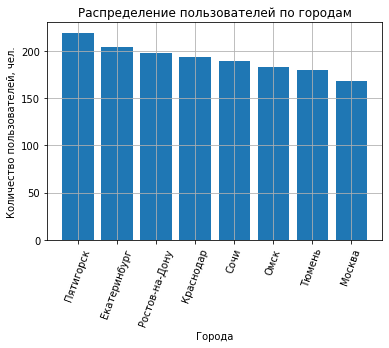

In [16]:
plt.bar(cities.index, cities)
plt.xticks(rotation=70)
plt.xlabel('Города')
plt.ylabel('Количество пользователей, чел.')
plt.title('Распределение пользователей по городам')
plt.grid(True)
plt.show()

Больше всего пользователей в Пятигорске, меньше всего - в Москве.

### Cоотношение пользователей с подпиской и без подписки

Исследуем распределение пользователь сервиса по типу подписки.

In [17]:
sub_type = users.groupby(by= 'subscription_type')['name'].count().sort_values(ascending=False)
sub_type

subscription_type
free     835
ultra    699
Name: name, dtype: int64

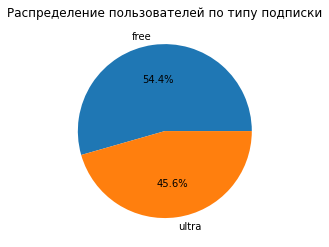

In [18]:
plt.pie(sub_type, labels = ['free', 'ultra'], autopct='%1.1f%%')
plt.title('Распределение пользователей по типу подписки')
plt.show()

Больше половины пользователей не имеют платной подписки.

### Возраст пользователей

Исследуем распределение пользователей сервиса по возрасту.

In [19]:
users.age.describe()

count   1,534.00
mean       24.90
std         4.57
min        12.00
25%        22.00
50%        25.00
75%        28.00
max        43.00
Name: age, dtype: float64

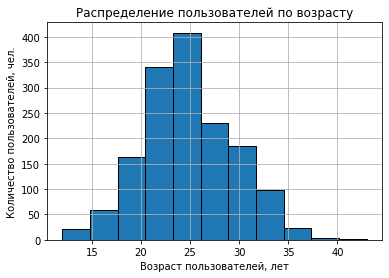

In [20]:
plt.hist(users.age, bins=11, edgecolor='black')
plt.xlabel('Возраст пользователей, лет')
plt.ylabel('Количество пользователей, чел.')
plt.title('Распределение пользователей по возрасту')
plt.grid(True)
plt.show()

В основном сервисом пользуются люди от 22 до 28 лет. Средний возраст пользователей 25 лет. Самому младшему пользователю 12 лет, самому старшему - 43 года.

### Протяженность поездок

Исследуем расстояние, преодолеваемое пользователем в рамках одной поездки.

In [21]:
rides.distance.describe()

count   18,068.00
mean     3,070.66
std      1,116.83
min          0.86
25%      2,543.23
50%      3,133.61
75%      3,776.22
max      7,211.01
Name: distance, dtype: float64

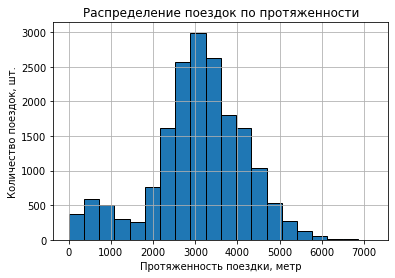

In [22]:
plt.hist(rides.distance, bins=20, edgecolor='black')
plt.xlabel('Протяженность поездки, метр')
plt.ylabel('Количество поездок, шт.')
plt.title('Распределение поездок по протяженности')
plt.grid(True)
plt.show()

Средняя протяженность поездки составляет чуть более 3 км. Большинство поездок совершаются на расстояние от 2,5 до 3,8 км, самая короткая дистанция равна 860 м, а самая длинная - чуть более 7 км. Среднее арифметическое исследуемого показателя близко медианному значению, что свидетельствует об отсутствии существенных выбросов.

### Продолжительность поездок

Исследуем продолжительность поездок.

In [23]:
rides.duration.describe()

count   18,068.00
mean        17.81
std          6.09
min          0.50
25%         13.60
50%         17.68
75%         21.72
max         40.82
Name: duration, dtype: float64

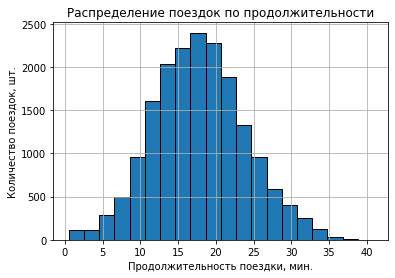

In [24]:
plt.hist(rides.duration, bins=20, edgecolor='black')
plt.xlabel('Продолжительность поездки, мин.')
plt.ylabel('Количество поездок, шт.')
plt.title('Распределение поездок по продолжительности')
plt.grid(True)
plt.show()

Средняя продолжительность поездки составляет около 18 минут. Максимальное время поездки - почти 41 минута. Минимальное зафиксированное время поездки - полминуты. Столь малое значение кажется аномалией, оно может быть вызвано технической ошибкой или желанием пользователя сменить самокат до начала реального передвижения. Но поскольку, судя по гистограмме, это значение не является выбросом, распределение нормальное, и среднее арифметическое исследуемого показателя близко медианному значению, задавать левый порог не имеет смысла.

**Выводы:**

* Сервис аренды самокатов GoFast предоставляет свои услуги в 8 городах России, с наибольшим количеством пользователей в Пятигорске и наименьшим в Москве.

* Большинство пользователей (54,4%) не имеют платной подписки.

* Основная группа получателей услуги – это люди в возрасте от 22 до 28 лет. Средний возраст пользователей 25 лет, самому младшему пользователю 12 лет, а самому старшему - 43 года.

* Средняя протяженность поездки - чуть более 3 км. Большинство поездок совершаются на расстояние от 2,5 до 3,8 км, при этом самая короткая дистанция равна 860 м, а самая длинная - чуть более 7 км. 

* Средняя продолжительность поездки составляет около 18 минут, максимальное время поездки - почти 41 минута.


## Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм

Объединим данные о пользователях и поездках в одну таблицу.

In [25]:
df = rides.merge(users, how='left', on='user_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.4+ MB


В получившейся таблице 9 столбцов и 18068 строк, пропусков нет, типы данных соответствуют содержанию. Объединение прошло успешно.

Добавим в полученную таблицу информацию о подписках.

In [26]:
data = df.merge(subscr, how='left', on='subscription_type')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


В получившейся таблице 12 столбцов и 18068 строк, пропусков нет, типы данных соответствуют содержанию. Объединение прошло успешно.

### Создание датафреймов с информацией о пользователях с подпиской и без нее.

Создадим таблицу, содержащую информаицю о пользователях не имеющих подписки.

In [27]:
users_free = data.loc[data['subscription_type'] == 'free'].copy().reset_index(drop=True)
users_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,"2,515.69",14.94,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,700,846.93,16.23,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,700,"4,004.43",20.02,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,700,"1,205.91",9.78,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,700,"3,047.38",17.43,2021-02-14,2,Айдар,22,Омск,free,8,50,0


Создадим таблицу, содержащую информаицю о пользователях с подпиской.

In [28]:
users_ultra = data.loc[data['subscription_type'] == 'ultra'].copy().reset_index(drop=True)
users_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,"4,409.92",25.60,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,"2,617.59",15.82,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.16,6.23,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,"2,694.78",18.51,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,"4,028.69",26.27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


### Визуализация данных о протяженности и продолжительности поездок пользователей в зависимости от типа подписки.

Исследуем данные о протяженности поездок пользователей.

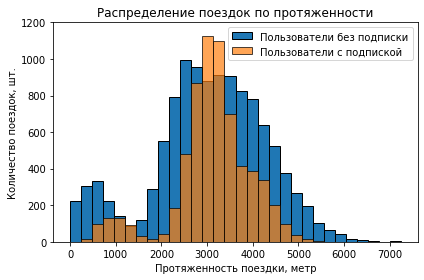

In [29]:
_, ax = plt.subplots()

ax.hist(users_free.distance, bins=30, range=(0, 7250), edgecolor='black', label='Пользователи без подписки')
ax.set_xlabel('Протяженность поездки, метр')
ax.set_ylabel('Количество поездок, шт.')
ax.set_ylim(0, 1200)

ax.hist(users_ultra.distance, bins=30, range=(0, 7250), edgecolor='black', label='Пользователи с подпиской', alpha=0.7)
ax.set_xlabel('Протяженность поездки, метр')
ax.set_ylabel('Количество поездок, шт.')
ax.set_ylim(0, 1200)

plt.title('Распределение поездок по протяженности')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Согласно гистограммам, пользователи без подписки склонны проезжать большее расстояние за одну поездку, чем пользователи с подпиской, об этом свидетельствует величина разброса данных. Тем не менее, наиболее часто встречающаяся дистанция для пользователей без подписки - около 2,5 км, а для пользователей с подпиской - около 3 км.

Исследуем данные о продолжительности поездок пользователей.

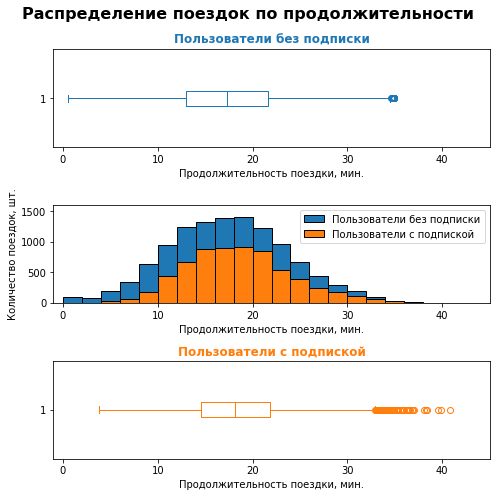

In [30]:
_, (ax_box1, ax_hist, ax_box2) = plt.subplots(3, figsize=(7,7))

ax_hist.hist(users_free.duration, bins=21, range=(0, 42), edgecolor='black', label='Пользователи без подписки')
ax_hist.set_xlabel('Продолжительность поездки, мин.')
ax_hist.set_ylabel('Количество поездок, шт.')
ax_hist.set_ylim(0, 1600)
ax_hist.set_xlim(-1, 45)

ax_hist.hist(users_ultra.duration, bins=21, range=(0, 42), edgecolor='black', label='Пользователи с подпиской')
ax_hist.set_xlabel('Продолжительность поездки, мин.')
ax_hist.set_ylabel('Количество поездок, шт.')
ax_hist.set_ylim(-1, 1600)
ax_hist.legend(loc='best')

color1 = {'color': '#1f77b4'}
color2 = {'color': '#ff7f0e'}

ax_box1.boxplot(users_free.duration, vert=False, boxprops=color1, whiskerprops=color1, capprops=color1, flierprops={'markeredgecolor': '#1f77b4'}, medianprops=color1)
ax_box1.set_xlabel('Продолжительность поездки, мин.')
ax_box1.set_title('Пользователи без подписки', color='#1f77b4', fontweight='bold')
ax_box1.set_xlim(-1, 45)

ax_box2.boxplot(users_ultra.duration, vert=False, boxprops=color2, whiskerprops=color2, capprops=color2, flierprops={'markeredgecolor': '#ff7f0e'})
ax_box2.set_xlabel('Продолжительность поездки, мин.')
ax_box2.set_title('Пользователи с подпиской', color='#ff7f0e', fontweight='bold')
ax_box2.set_xlim(-1, 45)

plt.suptitle('Распределение поездок по продолжительности', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

Как видно из диаграмм, большинство пользователей совершает поездки длительностью 15-20 минут, как с подпиской так и без. Так же можно наблюдать, что максимальное время поездки в группе пользователей с подпиской выше, чем в группе пользователей без подписки.

**Выводы:**

* Предварительно обработанные исходные данные были объединены в одну таблицу, а затем разбиты на 2 датафрейма согласно типу подписки.

* Визуальный анализ данных о протяженности поездок показал, что пользователи с подпиской за одну поездку чаще всего проезжают около 3 км, а пользователи без подписки – на 500 метров меньше. 

* Согласно гистограммам распределения продолжительности поездок, наиболее часто пользователи арендуют самокат на 15–20 минут, не зависимо от подписки.


## Рассчёт выручки за исследуемый период

Для рассчета выручки создадим датафрейм с агрегированными данными о количестве, продолжительности и протяженности поездкок каждого пользователя за каждый месяц.

In [31]:
pivot_data = data.pivot_table(
    index = ['user_id', 'subscription_type', 'month'],
    values = ['distance', 'duration'],
    aggfunc = {'distance': ['sum', 'count'], 'duration': 'sum'}
)

pivot_data = pivot_data.reset_index()
pivot_data.columns = ['user_id', 'subscription_type', 'month', 'rides', 'distance', 'duration']
pivot_data.head(10)

,user_id,subscription_type,month,rides,distance,duration
0,1,ultra,1,2,"7,027.51",41.42
1,1,ultra,4,1,754.16,6.23
2,1,ultra,8,2,"6,723.47",44.78
3,1,ultra,10,2,"5,809.91",31.58
4,1,ultra,11,3,"7,003.50",53.40
5,1,ultra,12,2,"6,751.63",27.20
6,2,ultra,3,3,"10,187.72",60.96
7,2,ultra,4,2,"6,164.38",39.05
8,2,ultra,6,1,"3,255.34",13.85
9,2,ultra,7,2,"6,780.72",46.17


Стоимость поездки определяется как сумма стоимости старта и произведения продолжительности поездки на поминутный тариф, при этом время поездки округляется до следующего целого числа. Добавим в полученную таблицу информацию о стоимости поездок в зависимости от типа подписки, и столбец, округляющий продолжительность поездок.

In [32]:
merged_data = (pivot_data
               .assign(duration_round = np.ceil(pivot_data['duration']))
               .merge(subscr, how='left', on='subscription_type')
)
merged_data.head(10)

,user_id,subscription_type,month,rides,distance,duration,duration_round,minute_price,start_ride_price,subscription_fee
0,1,ultra,1,2,"7,027.51",41.42,42.00,6,0,199
1,1,ultra,4,1,754.16,6.23,7.00,6,0,199
2,1,ultra,8,2,"6,723.47",44.78,45.00,6,0,199
3,1,ultra,10,2,"5,809.91",31.58,32.00,6,0,199
4,1,ultra,11,3,"7,003.50",53.40,54.00,6,0,199
5,1,ultra,12,2,"6,751.63",27.20,28.00,6,0,199
6,2,ultra,3,3,"10,187.72",60.96,61.00,6,0,199
7,2,ultra,4,2,"6,164.38",39.05,40.00,6,0,199
8,2,ultra,6,1,"3,255.34",13.85,14.00,6,0,199
9,2,ultra,7,2,"6,780.72",46.17,47.00,6,0,199


Вычислим выручку за исследуемый период.

In [33]:
merged_data['revenue'] = (  merged_data['rides'] * merged_data['start_ride_price']\
                          + merged_data['duration_round'] * merged_data['minute_price']\
                          + merged_data['subscription_fee']
)
merged_data.head(10)

,user_id,subscription_type,month,rides,distance,duration,duration_round,minute_price,start_ride_price,subscription_fee,revenue
0,1,ultra,1,2,"7,027.51",41.42,42.00,6,0,199,451.00
1,1,ultra,4,1,754.16,6.23,7.00,6,0,199,241.00
2,1,ultra,8,2,"6,723.47",44.78,45.00,6,0,199,469.00
3,1,ultra,10,2,"5,809.91",31.58,32.00,6,0,199,391.00
4,1,ultra,11,3,"7,003.50",53.40,54.00,6,0,199,523.00
5,1,ultra,12,2,"6,751.63",27.20,28.00,6,0,199,367.00
6,2,ultra,3,3,"10,187.72",60.96,61.00,6,0,199,565.00
7,2,ultra,4,2,"6,164.38",39.05,40.00,6,0,199,439.00
8,2,ultra,6,1,"3,255.34",13.85,14.00,6,0,199,283.00
9,2,ultra,7,2,"6,780.72",46.17,47.00,6,0,199,481.00


In [34]:
total_revenue = merged_data['revenue'].sum()
total_revenue

3853677.0

Общая выручка сервиса аренды самокатов GoFast за исследуемый период составила 3 853 677 рублей.

## Проверка гипотез

Для проверки выдвинутых гипотез необходимо установить уровень статистической значимости до проведения тестов. В качестве уровня отсечения для отклонения нулевой гипотезы возьмем значение, предложенное Р. Фишером в публикации "Статистические методы для научных работников", равное 0,05.

### Гипотеза 1: пользователи с подпиской тратят больше времени на поездки

Для проверки данной гипотезы воспользуемся методом проверки альтернативной односторонней гипотезы для средних двух генеральных совокупностей. Поскольку имеющие выборки различны по размеру, будем исходить из предположения, что дисперсии генеральных совокупностей не равны.

Сформулируем гипотезы.

*Нулевая гипотеза:* Среднее время поездки пользователя с подпиской равно среднему времени поездки пользователя без подписки.

*Альтернативная гипотеза:* Среднее время поездки пользователя с подпиской больше чем среднее время поездки пользователя без подписки.

In [35]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(users_ultra['duration'], users_free['duration'], equal_var=False, alternative='greater')


if results.pvalue > alpha:
    print('Нулевую гипотезу не следует отвергать')
else:
    print('Нулевую гипотезу следует отвергнуть и принять верной альтернативную')

Нулевую гипотезу следует отвергнуть и принять верной альтернативную


Пользователи с подпиской действительно тратят больше времени на поездки.

### Гипотеза 2: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Для проверки данной гипотезы воспользуемся методом проверки альтернативной односторонней гипотезы о том, что истинное среднее меньше предполагаемого значения.

Сформулируем гипотезы.

*Нулевая гипотеза:* Средняя протяженность поездки пользователя с подпиской равна 3130 метром.

*Альтернативная гипотеза:* Средняя протяженность поездки пользователя с подпиской меньше чем 3130 метров.

In [36]:
alpha = 0.05 # уровень статистической значимости

distance_i = 3130 # оптимальное растояние с точки зрения износа самоката

results = st.ttest_1samp(users_ultra['distance'], distance_i, alternative='less')

if results.pvalue > alpha:
    print('Нулевую гипотезу не следует отвергать')
else:
    print('Нулевую гипотезу следует отвергнуть и принять верной альтернативную')

Нулевую гипотезу не следует отвергать


Пользователь с подпиской вероятнее всего за одну поездку проедет 3130 метров или больше.

### Гипотеза 3: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Вычислим общую помесячную выручку от пользователей с подпиской.

In [37]:
revenue_ultra = merged_data.loc[merged_data['subscription_type'] == 'ultra'].copy()
revenue_ultra_per_month = revenue_ultra.groupby('month')['revenue'].sum()
revenue_ultra_per_month

month
1    143,502.00
2    124,266.00
3    142,074.00
4    136,826.00
5    148,647.00
6    143,342.00
7    142,896.00
8    138,096.00
9    128,863.00
10   133,446.00
11   126,096.00
12   130,543.00
Name: revenue, dtype: float64

Вычислим количество пользователь с подпиской по месяцам.

In [38]:
users_ultra_per_month = revenue_ultra.groupby('month')['user_id'].nunique()
users_ultra_per_month

month
1     390
2     354
3     396
4     374
5     405
6     398
7     390
8     384
9     355
10    372
11    354
12    361
Name: user_id, dtype: int64

Вычислим помесячную выручку в рассчете на одного пользователя с подпиской.

In [39]:
revenue_ultra_one_per_month = revenue_ultra_per_month/users_ultra_per_month
revenue_ultra_one_per_month

month
1    367.95
2    351.03
3    358.77
4    365.84
5    367.03
6    360.16
7    366.40
8    359.62
9    362.99
10   358.73
11   356.20
12   361.61
dtype: float64

Вычислим общую помесячную выручку от пользователей без подписки.

In [40]:
revenue_free = merged_data.loc[merged_data['subscription_type'] == 'free'].copy()
revenue_free_per_month = revenue_free.groupby('month')['revenue'].sum()
revenue_free_per_month

month
1    192,362.00
2    164,504.00
3    185,638.00
4    183,934.00
5    186,334.00
6    190,488.00
7    183,558.00
8    185,404.00
9    192,100.00
10   179,732.00
11   177,604.00
12   193,422.00
Name: revenue, dtype: float64

Вычислим количество пользователь без подписки по месяцам.

In [41]:
users_free_per_month = revenue_free.groupby('month')['user_id'].nunique()
users_free_per_month

month
1     600
2     529
3     556
4     553
5     573
6     589
7     562
8     565
9     577
10    549
11    555
12    590
Name: user_id, dtype: int64

Вычислим помесячную выручку в рассчете на одного пользователя без подписки.

In [42]:
revenue_free_one_per_month = revenue_free_per_month/users_free_per_month
revenue_free_one_per_month

month
1    320.60
2    310.97
3    333.88
4    332.61
5    325.19
6    323.41
7    326.62
8    328.15
9    332.93
10   327.38
11   320.01
12   327.83
dtype: float64

Для проверки данной гипотезы воспользуемся методом проверки альтернативной односторонней гипотезы для средних двух генеральных совокупностей. Поскольку имеющие выборки одинаковы по размеру, будем исходить из предположения, что дисперсии генеральных совокупностей равны.

Сформулируем гипотезы на основе данных об общей ежемесячной выручке.

*Нулевая гипотеза:* Среднее общей ежемесячной выручки от пользователей с подпиской равно среднему общей ежемесячной выручки от пользователей без подписки.

*Альтернативная гипотеза:* Среднее общей ежемесячной выручки от пользователей с подпиской больше среднего общей ежемесячной выручки от пользователей без подписки.

In [43]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(revenue_ultra_per_month, revenue_free_per_month, alternative='greater')

if results.pvalue > alpha:
    print('Нулевую гипотезу не следует отвергать')
else:
    print('Нулевую гипотезу следует отвергнуть и принять верной альтернативную')

Нулевую гипотезу не следует отвергать


Ежемесячная общая выручка от пользователей с подпиской не выше, чем выручка от пользователей без подписки.

Сформулируем гипотезы на основе данных о ежемесячной выручке в расчете на одного пользователя.

*Нулевая гипотеза:* Среднее ежемесячной выручки от одного пользователя с подпиской равно среднему ежемесячной выручки от одного пользователя без подписки.

*Альтернативная гипотеза:* Среднее ежемесячной выручки от одного пользователя с подпиской больше среднего ежемесячной выручки от одного пользователя без подписки.

In [44]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(revenue_ultra_one_per_month, revenue_free_one_per_month, alternative='greater')

if results.pvalue > alpha:
    print('Нулевую гипотезу не следует отвергать')
else:
    print('Нулевую гипотезу следует отвергнуть и принять верной альтернативную')

Нулевую гипотезу следует отвергнуть и принять верной альтернативную


Ежемесячная выручка от одного пользователя с подпиской выше, чем от одного пользователя без подписки.

### Гипотеза 4: обновление сервера, с которыми взаимодействует мобильное приложение приведет к значительному снижению количества обращений в техподдержку


Для проверки данной гипотезы следует воспользоваться методом проверки альтернативной односторонней гипотезы о том, что истинное среднее генеральной совокупности до изменения больше, чем истинное среднее генеральной совокупности после изменения.

Сформулируем гипотезы.

*Нулевая гипотеза:* Среднее количество обращений в техподдержку до обновления сервера равно среднему количеству обращений после обновления сервера.

*Альтернативная гипотеза:* Среднее количество обращений в техподдержку до обновления сервера больше среднего количества обращений после обновления сервера.

Код, который был бы использован при наличии данных:

```
alpha = 0.05 

results = st.ttest_rel(suppotr_before, support_after, alternative='greater')

if results.pvalue > alpha:
    print('Нулевую гипотезу не следует отвергать')
else:
    print('Нулевую гипотезу следует отвергнуть и принять верной альтернативную')
```

**Выводы:**
* Пользователи с подпиской используют сервис аренды самокатов активнее, чем пользователи без подписки.

* Вероятность того, что пользователь с подпиской за одну поездку преодолеет расстояние большее, чем оптимальное с точки зрения износа самоката, достаточно высока.

* Помесячная выручка от пользователя с подпиской выше, чем от пользователя без подписки.


## Оптимизация маркетинговых акций 

### Акция 1: один бесплатный месяц подписки

Задача акции: минимум 100 клиентов, из привлеченных по акции, должны продлить подписку.

Известно, что после бесплатного пробного периода подписку продлевают 10 % пользователей.

Рассчитаем какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. 

Минимальное количество промокодов: 1172


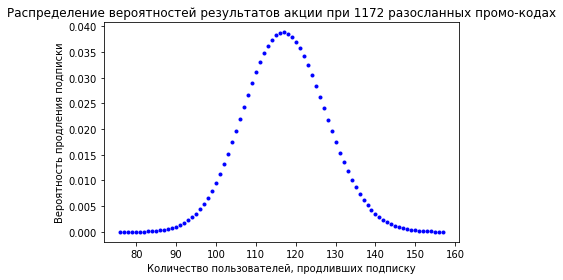

In [45]:
k = 100 # количество пользователей продливших подписку
p = 0.1 # вероятность продления подписки
n_min = int(k/p) # минимальное количество промокодов
target_p = 0.05 # вероятность не выполнить план 

n = n_min
result = 1

while result > target_p :
    n +=1    
    distr = st.binom(n, p)
    result = distr.cdf(k)

print('Минимальное количество промокодов:', n)   

# определим границы графика биномиального распределения, где вероятности значений почти не равны нулю
left = int(n * p - 4 * (n * p * (1 - p))**0.5)
right = int(n * p + 4 * (n * p * (1 - p))**0.5)

x = list(range(max(0, left), right))
plt.plot(x, st.binom.pmf(x, n, p), 'bo', ms=3)
plt.xlabel('Количество пользователей, продливших подписку')
plt.ylabel('Вероятность продления подписки')
plt.title(f'Распределение вероятностей результатов акции при {n} разосланных промо-кодах')
plt.tight_layout()
plt.show()

Минимальное количество промокодов, которые нужно разослать, чтобы вероятность не выполнить задачу акции была примерно 5 %, составляет 1172 промокода.

### Акция 2: Рассылка push-уведомлений

Задача акции в задании не определена.

Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений.

Оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [46]:
n = 1000000 # количество push-уведомлений
p = 0.4 # вероятность открытия уведомления
x = 399500 # пороговое значение открытий уведомлений

mu = n * p
sigma = (n * p * (1 - p))**0.5

distr = st.norm(mu, sigma)

result = distr.cdf(x)
result

0.15371708296369768

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей при 1 млн разосланных уведомлений составляет 15%.

## Общий вывод

Представленные на анализ данные состояли из трех таблиц, которые были объединены в единый датафрейм. В исходных данных были удалены явные дубликаты, аномалий и пропусков не обнаружено.

Данные были исследованы на наличие закономерностей в использовании сервиса аренды самокатов пользователями с различными тарифными планами. А так же проведена проверка нескольких гипотез о поведении пользователей.

Анализ предоставленных данных позволяет сделать следующие выводы:

* Сервис предоставляет свои услуги в 8 городах России. Больше всего пользователей в Пятигорске, меньше всего в Москве.

* Большинство пользователей (54,4%) не имеют платной подписки.

* Основная группа получателей услуги – это люди в возрасте от 22 до 28 лет.

* Большинство поездок длятся 15–20 мин. и совершаются на расстояние 2,5–3,8 км

* Средняя продолжительность поездки - около 18 минут.

* Средняя протяженность одной поездки - чуть более 3 км (3 133,61 м).

* Согласно визуальному анализу данных о протяженности поездок, пользователи с подпиской за одну поездку чаще всего проезжают около 3 км, а пользователи без подписки – на 500 метров меньше.

* Общая выручка сервиса аренды самокатов GoFast за исследуемый период составила 3 853 677 рублей.




В результате проверки гипотез удалось установить:

* Пользователь с подпиской с достаточно большой вероятность совершит более длительною поездку, чем пользователь без подписки.

* Пользователь с подпиской вероятнее проедет за одну поездку расстояние большее, чем оптимальное с точки зрения износа самоката (3 130 м).

* Общая выручка от пользователей с подпиской не выше, чем от пользователей без подписки. Это объясняется меньшим количеством пользователей с подпиской. 

* Пользователь с подпиской приносит большую выручку в сравнении с пользователем без подписки.


Рекомендации по оптимизации маркетинговый акций:

* Если вероятность провала акции по увеличению количества пользователей с подпиской установлена на уровне примерно 5%, то для увеличения показателя на 100 человек следует разослать не менее 1172 промокодов.

* Если разослать 1 млн push-уведомлений, то с 15% вероятностью будет открыто не более 399,5 тыс.


Рекомендации по оптимизации бизнеса:

* Для увеличения выручки сервиса рекомендуется провести акции не только по увеличению количества пользователей с подпиской, но также и по увеличению количества поездок.

* Для увеличения прибыли сервиса рекомендуется разработать тарифные планы, учитывающие оптимальную, с точки зрения износа самоката, протяженность поездки. В качестве альтернативы можно предложить разработать план мер по уменьшению скорости передвижения.